La duración del examen son **2h 45min**. Se recomienda que leáis bien lo que se os pide en cada apartado. Es estima que los 3 primeros ejercicios deberían llevar aproximadamente 45-50 minutos cada uno, y el ejercicio de normalización entre 15-30 minutos. La recogida de exámenes se hace por el sistema de archivos **ftp** de los laboratorios.

# Ejercicio 1 PostgreSQL (3 ptos)

Nos han pedido implementar una aplicación web en `Flask` para construir mazos del juego _Magic the Gathering_. Después de analizar los requisitos del sistema, tenemos el siguiente modelo E-R:

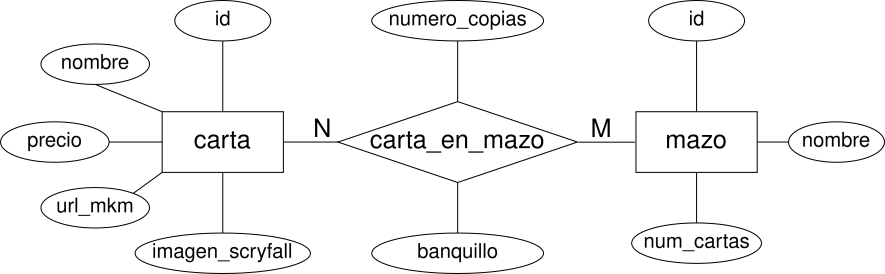

del cual hemos generado el siguiente esquema relacional:

* carta(<ins>id</ins>, nombre, precio*, imagen_scryfall*, url_mkm*)
* mazo(<ins>id</ins>, nombre, num_cartas)
* carta_en_mazo(<ins>id_carta</ins>, <ins>id_mazo</ins>, numero_copias, banquillo)
    - carta_en_mazo.id_carta -> carta.id
    - carta_en_mazo.id_mazo -> mazo.id

Implementa en el proyecto `Ejercicio 1` las distintas rutas que aparecen en el archivo `rutas.py`, completando las declaraciones de `modelo.py`. La puntuación de cada apartado aparece en las funciones de vista de las rutas.

**NOTA**: se os proporcionan la especificación de algunas columnas en las clases: _id_ en las tablas _Carta_ y _Mazo_, y _num\_cartas_ en _Mazo_. Estas columnas hacen uso de los modificadores _autoincrement_ y _default_ (que quizás no recordéis de clase). Si creáis las tablas desde pgAdmin, las columnas _id_ de ambas tablas deben incluir `SERIAL` además de `PRIMARY KEY` para que se asigne un id distinto por defecto al hacer las inserciones. Os recomiendo que utilicéis la opción de `db.create_all()` que se explica en las instrucciones.

# Ejercicio 2 MongoDB (3 ptos)

Vamos a montar nuestro propio servicio de _streaming_ en la Facultad de Informática, _FdIx_. Nuestra base de datos en MongoDB cuenta con tres colecciones: _movies_, la cual contiene la lista disponible de películas; _users_, que contiene la lista de usuarios registrados; y _comments_, la cual contiene una lista de comentarios de nuestras películas.

Datos Generales:

* Nombre Base de Datos: `fdix`

* Nombre Archivo 1: `movies.json`
* Nombre Colección 1: `movies`

* Nombre Archivo 2: `users.json`
* Nombre Colección 2: `users`

* Nombre Archivo 3: `comments.json`
* Nombre Colección 3: `comments`

Se os pide que implementéis los métodos que aparecen en la clase `GestionFdIx` del archivo `.py` correspondiente. Los métodos son los siguientes:

## 2.1 Actualizar Nombres (0.5 ptos)

Crea una función que cambie el nombre asociado a un email. Para ello, hay que actualizar tanto la colección de usuarios como la de comentarios. No es necesario devolver el resultado de las actualizaciones.

```python
def actualizar_nombre(self, email: str, nombre_nuevo: str):
```

Prueba a actualizar el nombre del email `sean_bean@gameofthron.es` por `Ned Starkn't`.

## 2.2 Películas de un Género (0.75 ptos)

Devuelve el número de elementos que hay asociados a un género de película dado.

```python
def numero_peliculas_genero(self, genero: str) -> int
```

Esquema: **numeroPeliculas**


## 2.3 Comentaristas (0.75 ptos)

Devuelve la lista de usuarios (email y nombre) que han comentado en una película dada:

```python
def han_comentado(self, titulo: str) -> List[Dict[str, str]]
```

Esquema: **(email, nombre)**

## 2.4 Película más debatida recientemente (1 pto)

Devuelve el título de la película que tiene mayor discusión entre una lista de películas, considerando aquellas películas que tienen al menos un comentario a partir de una fecha dada. Para medir el nivel de discusión, contamos cuántos comentarios hay asociados a esa película (independientemente de la fecha).

```python
def pelicula_mas_comentada(self, fecha: datetime.datetime, lista_peliculas: List[str]) -> str
```

**NOTA**: el parámetro `lista_peliculas` contiene la lista con los títulos de las películas.

# Ejercicio 3 Neo4j (2.5 ptos)

Vamos a crear nuestra propia base de datos que modele la red social **Bluesky**, utilizando una muestra representativa de las cuentas que siguen y son seguidas por la cuenta oficial de la UCM: `@ucm.es`. El modelo de datos es el siguiente:

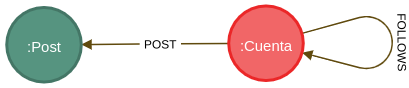
donde tenemos las siguientes propiedades en nodos y relaciones:

* `:Post`: cuenta,texto,fecha_creacion.
* `:Cuenta`: cuenta,nombre,bio,num_followers,num_following,num_posts.
* `:POSTS`: ninguna propiedad.
* `:FOLLOWS`: ninguna propiedad.

Se os proporciona un archivo `.py` con la clase `GestionBluesky` y la base de datos en el archivo `bluesky.dump`. Debe implementar las siguientes operaciones:

## 3.1 Crear Perfil (0.5 ptos)

Crea un nuevo perfil con la información de la cuenta:

1. Etiqueta: la etiqueta es `:Cuenta`.
1. Propiedades:
    * cuenta: `ABDucidos.bsky.social`.
    * nombre: `Ampliación de Bases de Datos`
    * bio: `Bases de Datos Relacionales, No SQL... ¡Tenemos de todo!`
    * num_followers: 0
    * num_following: 0
    * num_posts: 0

Además, introduce un post que grite a los cuatro vientos: `¡Hola mundo!`. La función debe devolver el resumen de la ejecución (`resumen.counters`, siendo `resumen` la segunda componente del resultado de `execute_query`).

## 3.2 Marcar Post Ofensivos (0.5 ptos)

Vamos a reemplazar la etiqueta `:Post` por `:PostOfensivo` en aquellos posts que incluyan el siguiente vocabulario, independientemente de mayúsculas y minúsculas: `gilipoll`, `subnormal`, `twitter` (no nos gusta la competencia) y `asshole`. Además, para las cuentas que han escrito un post ofensivo, vamos a añadir la propiedad _num_posts_ofensivos_ con el número de posts ofensivos. La función debe devolver el resumen de la ejecución (`resumen.counters`, siendo `resumen` la segunda componente del resultado de `execute_query`).

**NOTA**: puede que te sea útil utilizar la función `coalesce()`, que devuelve el primer valor no nulo que se le pasa como argumento.

## 3.3 Tasa de _Followback_ (0.75 ptos)

La tasa de _followback_ se computa como el cociente entre el número de cuentas que sigue un usuario (denominador) y cuántas de esas cuentas le siguen también (numerador). Implementa una función que, dada una cuenta, compute su tasa de _followback_ con respecto nuestra muestra. Por tanto, en esta función, no se puede utilizar la propiedad `num_followers`, ya que este número considera todos los seguidores en Bluesky.

**NOTA**: Recuerda utilizar la función `toFloat` para que la división sea decimal y no entera.

```python
def tasa_followback(self, cuenta: str) -> float:
```

## 3.4 Cuentas con Posts Similares (0.75 ptos)

Dada una palabra clave, queremos encontrar la conexión más corta entre usuarios que hayan escrito algún post que incluyan esta palabra clave. La función `posts_similares` debe devolver la secuencia de usuarios que conectan a los dos usuarios con estos posts.

```python
def posts_similares(self, palabra_clave: str) -> List[str]
```

Por ejemplo, para la palabra `obrera`, una secuencia posible de usuarios es `['miguelleon.bsky.social', 'espacioandaluz.bsky.social', 'isidrobarqueros.es', 'htejero.bsky.social']`.

# Ejercicio 4. Normalización (1.5 ptos)

La siguiente tabla modela qué empleados con la información de sus departamentos. Tenemos las siguientes restricciones:

1. Todos los empleados de un departamento están vinculados a un mismo edificio.
2. Cada empleado está identificado inequívocamente por su id, pero no por su nombre.

Hemos propuesto el siguiente modelo relacional para representar nuestro sistema. 

* en_dep(ID, nombre, sueldo, nombre_dpto, edificio, presupuesto)

Se os pide los siguientes apartados:

1. Computa las dependencias funcionales de la tabla inicial. **(0.5 ptos)**
2. Determina las claves candidatas de la tabla inicial. **(0.25 ptos)**
3. Indica si la tabla está en BCNF o no. Si no lo está, propón una descomposición en subtablas que preserve la información y cumpla esta forma normal. **(0.75 ptos)**

No es necesario justificar la respuesta en cada caso. Simplemente, incluid las soluciones.

# Entrega

Para la entrega, comprime en un archivo `.zip` los archivos `.py` de cada ejercicio (`modelos.py` y `rutas.py` para el primer ejercicio) y el archivo de texto con las respuestas sobre normalización. El nombre del archivo `.zip` debe incluir tu nombre y apellidos. Incluye en la primera línea de cada archivo de la solución un comentario con tu nombre y apellidos.